# Modelando el comportamiento de los arriendos de bicicletas en Seúl según la temperatura ambiental. 


### Importando Librerias

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import statsmodels as sms
import statsmodels.formula as smf


In [12]:
from pandas_profiling import ProfileReport


### Importando y leyendo base de Datos SeoulBikeData

In [6]:
# read the .csv file to dataframe bikedata
bikedata = pd.read_csv("SeoulBikeData.csv", encoding='latin-1')

In [7]:
bikedata.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [9]:
#Información General del Dataset

bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
#Renombrando Variables para su evaluación y Proceso

bikedata=bikedata.rename({'Rented Bike Count': 'Rented_Bike_Count','Temperature(°C)': 'Temperature' ,'Humidity(%)':'Humidity', 'Wind speed (m/s)': 'wind_speed', 
                 'Visibility (10m)':'Visibility', 'Dew point temperature(°C)':'Dew_point_temperature', 
                 'Solar Radiation (MJ/m2)':'Solar_radiation', 'Rainfall(mm)':'Rainfall', 'Snowfall (cm)': 'Snowfall',
                 'Functioning Day': 'Functioning_Day' },axis=1)

In [11]:
#Buscando Valores Nulos
bikedata.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [13]:
#Evaluando datos Duplicados

bikedata.duplicated().sum()

0

Data de variables iniciales y descripsción
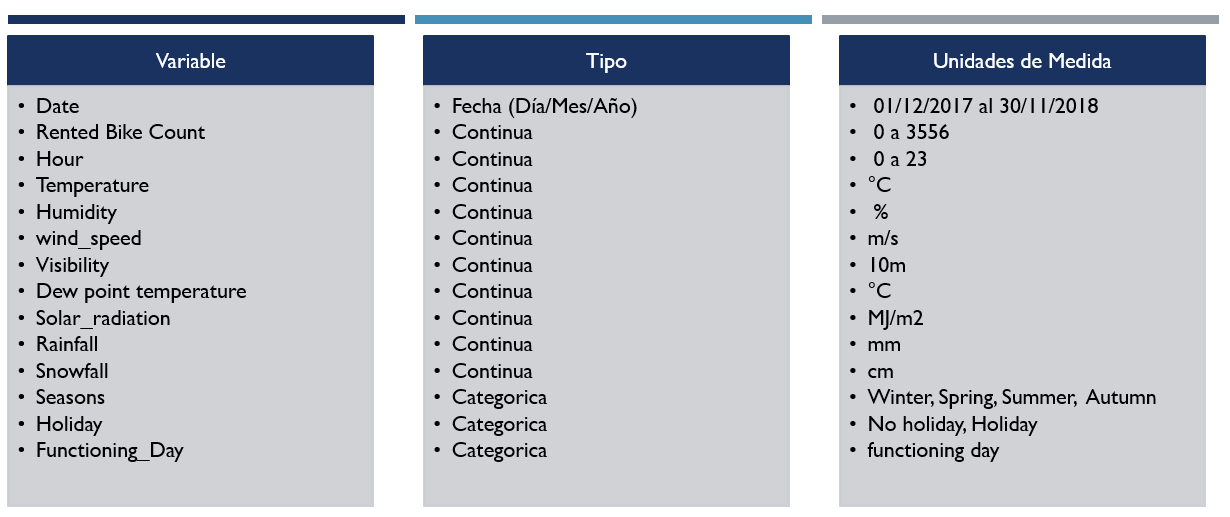

### Cambiando Fecha a formato 'Datetime' y creando variables de día, mes, año para evaluación de los arriendos de bicicletas

In [15]:
#trasformar fecha a formato 'Datetime'

bikedata['Date']=pd.to_datetime(bikedata['Date'],infer_datetime_format= True)
bikedata['Month']=bikedata.Date.dt.month_name().str[:3]
bikedata['Year']= bikedata.Date.dt.year
bikedata['Weekday']= bikedata.Date.dt.weekday
bikedata.Weekday= bikedata.Weekday.map({0:'Monday', 1:'Tuesday',2:'Wednesday', 3:'Thursday', 4:'Fryday', 5: 'Saturday', 6:'Sunday'})
bikedata['Weekday']= pd.Categorical(bikedata['Weekday'],
                     categories= ['Monday','Tuesday','Wednesday','Thursday', 'Fryday','Saturday', 'Sunday'] , ordered=True)
bikedata.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day Month  Year   Weekday  
0  Winter  No Holiday             Yes   Jan  2017  Thursday  
1  Winter  No Holiday             Yes   Jan  2017  Thursday  
2  Winter  No Holiday             Yes   Jan  2017  Thursday  
3  Winter  No Holiday             Yes   Jan  2017  Thursday  
4  Winter  No Holiday             Yes   Jan  2017  Thursday

### Visualizando las variables del Dataset

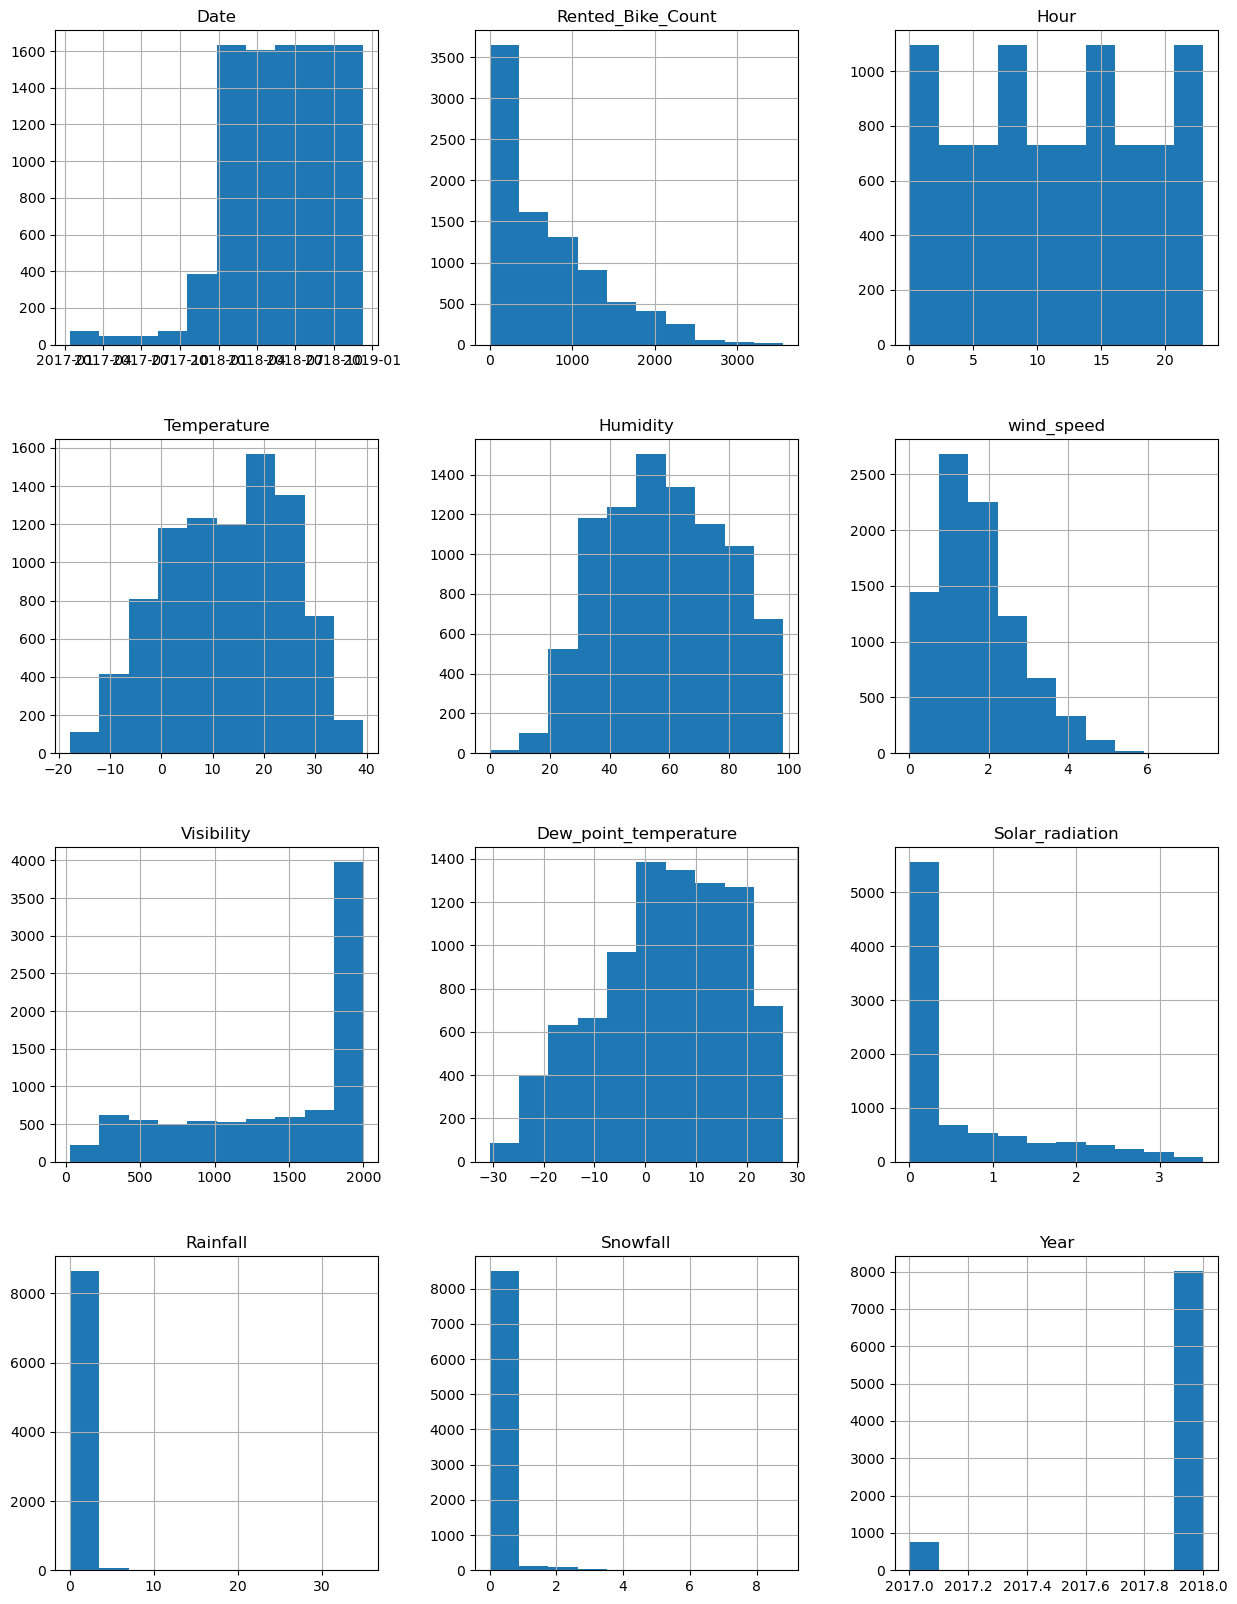

<Figure size 640x480 with 0 Axes>

In [16]:
#visualizando datos de manera independiente 

bikedata.hist(figsize=(15, 20))
plt.show()
plt.tight_layout()

In [17]:
#Evaluación de Esatdísticos de las variables

bikedata.describe().transpose()

count         mean         std     min      25%  \
Rented_Bike_Count      8760.0   704.602055  644.997468     0.0   191.00   
Hour                   8760.0    11.500000    6.922582     0.0     5.75   
Temperature            8760.0    12.882922   11.944825   -17.8     3.50   
Humidity               8760.0    58.226256   20.362413     0.0    42.00   
wind_speed             8760.0     1.724909    1.036300     0.0     0.90   
Visibility             8760.0  1436.825799  608.298712    27.0   940.00   
Dew_point_temperature  8760.0     4.073813   13.060369   -30.6    -4.70   
Solar_radiation        8760.0     0.569111    0.868746     0.0     0.00   
Rainfall               8760.0     0.148687    1.128193     0.0     0.00   
Snowfall               8760.0     0.075068    0.436746     0.0     0.00   
Year                   8760.0  2017.915068    0.278796  2017.0  2018.00   

                           50%      75%      max  
Rented_Bike_Count       504.50  1065.25  3556.00  
Hour                     11.50    17.25    23.00  
Temperature              13.70    22.50    39.40  
Humidity                 57.00    74.00    98.00  
wind_speed                1.50     2.30     7.40  
Visibility             1698.00  2000.00  2000.00  
Dew_point_temperature     5.10    14.80    27.20  
Solar_radiation           0.01     0.93     3.52  
Rainfall                  0.00     0.00    35.00  
Snowfall                  0.00     0.00     8.80  
Year                   2018.00  2018.00  2018.00

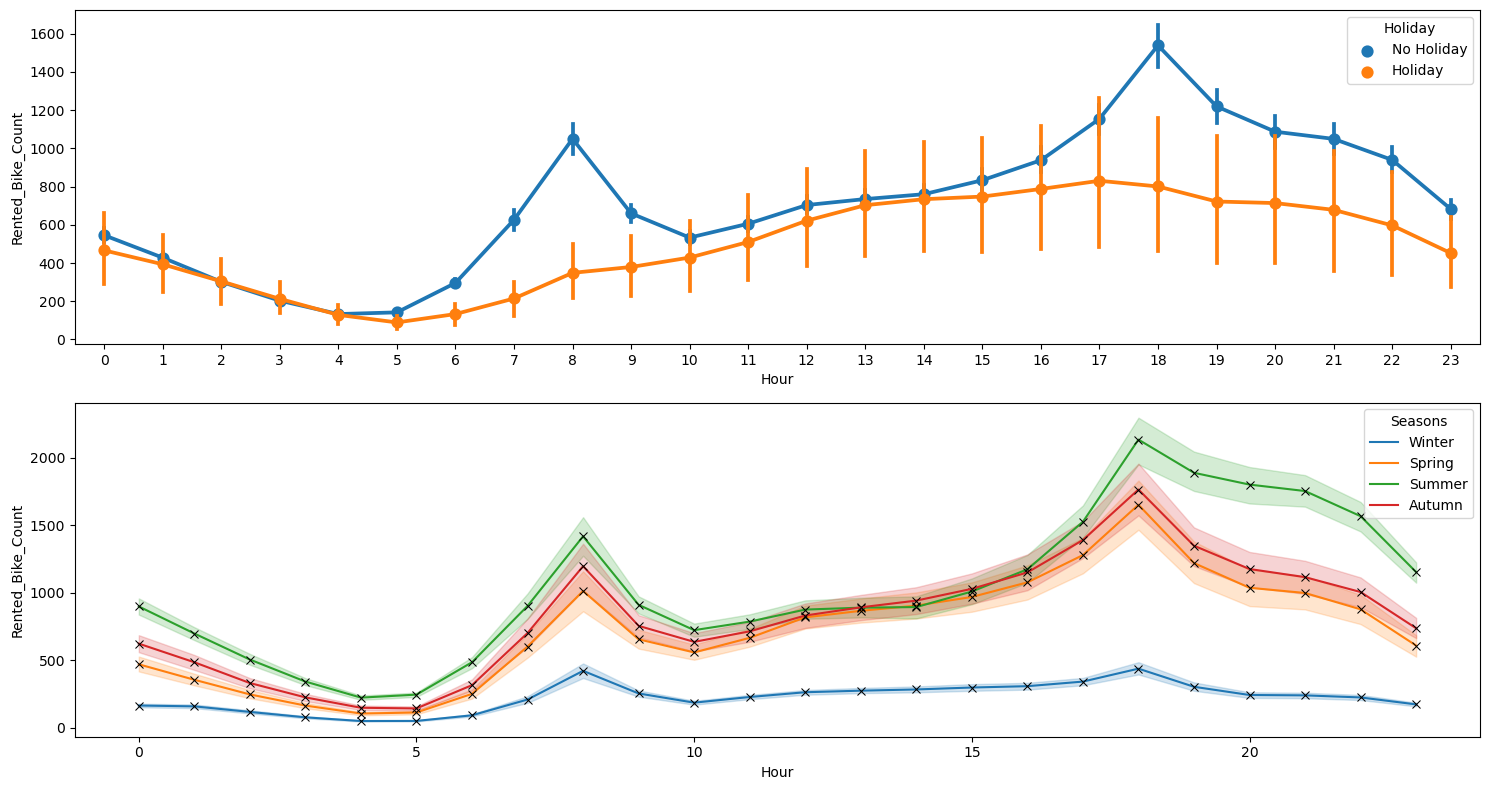

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=bikedata, x="Hour", y="Rented_Bike_Count", ax=axs[0], 
              hue="Holiday")
sns.lineplot(data=bikedata, x="Hour", y="Rented_Bike_Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()


## Graficos de arriendos en distintas medidas de tiempo

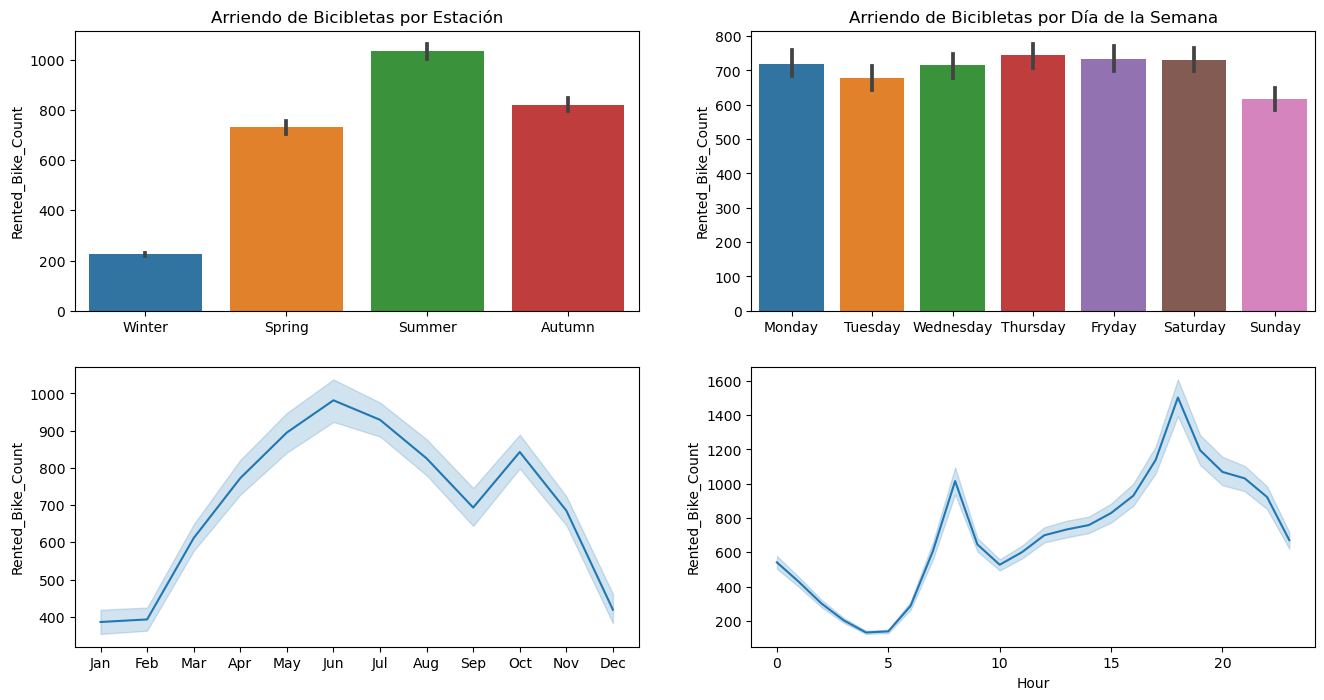

In [19]:
fig, ((ax1,ax2),(ax3,ax4))= plt.subplots(2,2,figsize=(16,8))
sns.barplot(data=bikedata, x= 'Seasons', y= 'Rented_Bike_Count', ax=ax1)
sns.lineplot(data= bikedata, x= 'Month', y= 'Rented_Bike_Count', ax=ax3, )
sns.barplot(data=bikedata, x= 'Weekday', y= 'Rented_Bike_Count', ax=ax2,)
sns.lineplot(data= bikedata, x= 'Hour', y= 'Rented_Bike_Count', ax=ax4, )
ax1.set_title('Arriendo de Bicibletas por Estación')
ax1.set_xlabel("")
ax3.set_xlabel("")
ax2.set_title('Arriendo de Bicibletas por Día de la Semana')
ax2.set_xlabel("")

plt.savefig('Linea de Tiempo.png',dpi=300)
plt.show()

### Visualizacion de Arriendo de bicicletas por horas en relación a vacaciones y estaciones del año

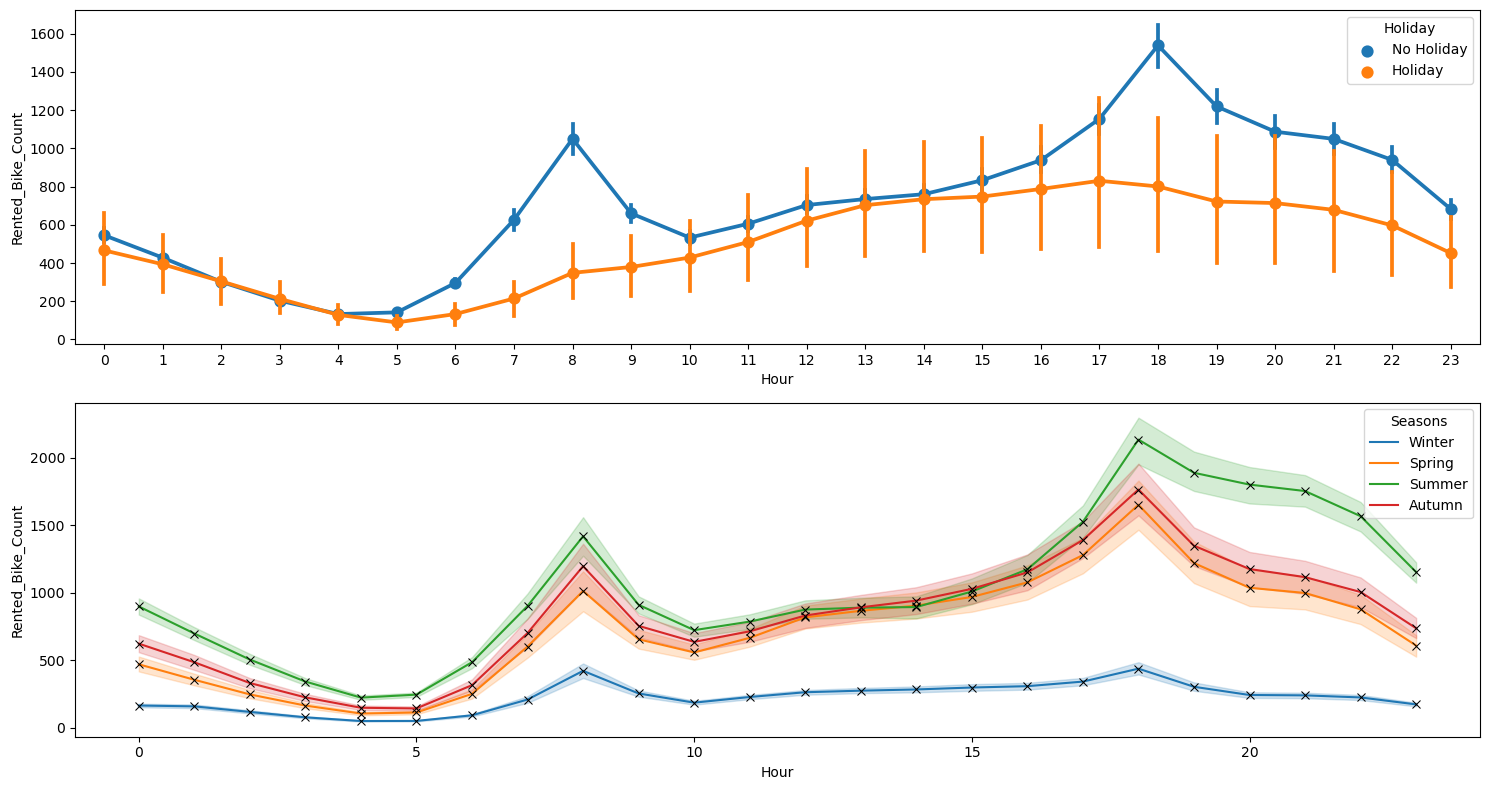

In [18]:
fig, axs = plt.subplots(nrows=2,ncols=1,figsize=(15,8), dpi=100)
sns.pointplot(data=bikedata, x="Hour", y="Rented_Bike_Count", ax=axs[0], 
              hue="Holiday")
sns.lineplot(data=bikedata, x="Hour", y="Rented_Bike_Count", ax=axs[1], 
              hue="Seasons", marker="x",markeredgecolor="black")
plt.tight_layout()


### VISUALIZACIÓN DE LAS VARIABLES DE MANERA INDIVIDUAL

#### Arriendo de Bicicletas por hora

<AxesSubplot:xlabel='Hour', ylabel='Rented_Bike_Count'>

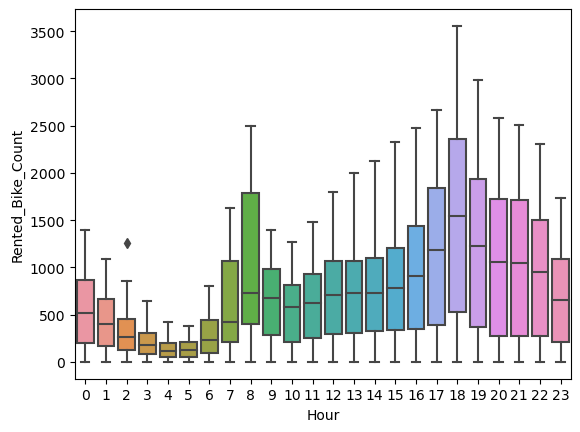

In [18]:
sns.boxplot(data=bikedata, x="Hour", y="Rented_Bike_Count")

In [19]:
# AGRUOANDO POR HORA Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Hora= bikedata.groupby('Hour').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Hora.head()

Hour  Rented_Bike_Count
0    18             548568
1    19             436229
2    17             415556
3    20             390172
4    21             376479

#### Arriendo de Bicicleta por Día de la Semana

<AxesSubplot:xlabel='Weekday', ylabel='Rented_Bike_Count'>

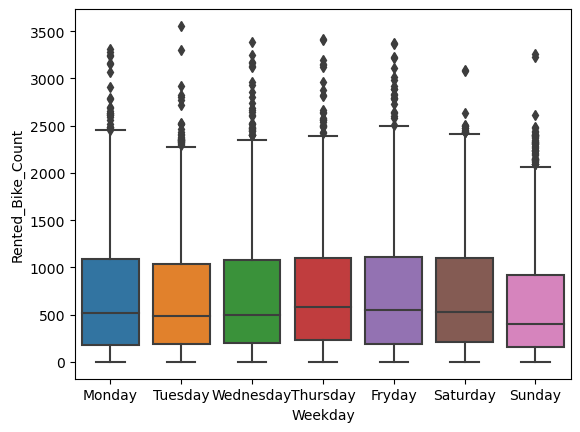

In [20]:
sns.boxplot(data=bikedata, x="Weekday", y="Rented_Bike_Count")

In [21]:
# AGRUOANDO POR DIA DE LA SEMANA Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Dia= bikedata.groupby('Weekday').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Dia

Weekday  Rented_Bike_Count
0   Thursday             928267
1   Saturday             911475
2  Wednesday             908871
3     Fryday             898966
4     Monday             863563
5    Tuesday             862877
6     Sunday             798295

#### Arriendo de Bicicletas por Día Funcional

<AxesSubplot:xlabel='Functioning_Day ', ylabel='Rented_Bike_Count'>

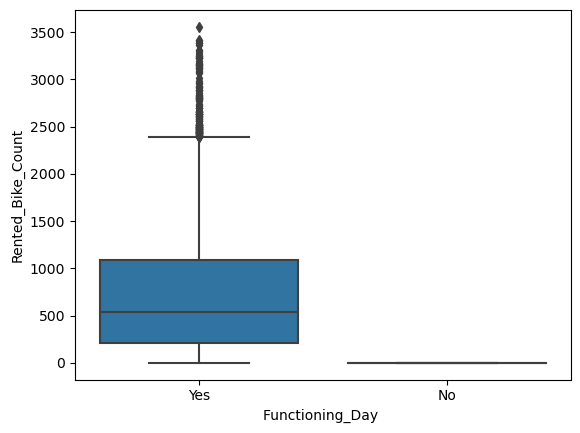

In [24]:
sns.boxplot(data=bikedata, x='Functioning_Day', y="Rented_Bike_Count")

In [31]:
# AGRUOANDO POR DIA DE LA SEMANA Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
dia_fun= bikedata.groupby('Functioning_Day').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
dia_fun.head()


Functioning_Day  Rented_Bike_Count
0             Yes            6172314
1              No                  0

#### Arriendo de Biciletas v/s Vacaciones (Hollidays)

<AxesSubplot:xlabel='Holiday', ylabel='Rented_Bike_Count'>

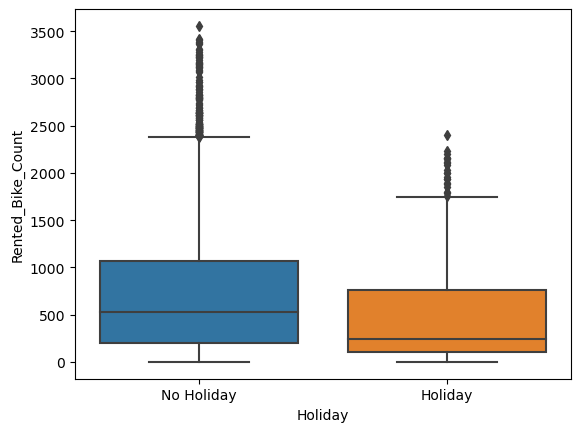

In [32]:
sns.boxplot(data=bikedata, x='Holiday', y="Rented_Bike_Count")

In [33]:
# AGRUOANDO POR HOLIDAY Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Holiday= bikedata.groupby('Holiday').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Holiday

Holiday  Rented_Bike_Count
0  No Holiday            5956419
1     Holiday             215895

#### Arriendo de Bicicletas por mes

<AxesSubplot:xlabel='Month', ylabel='Rented_Bike_Count'>

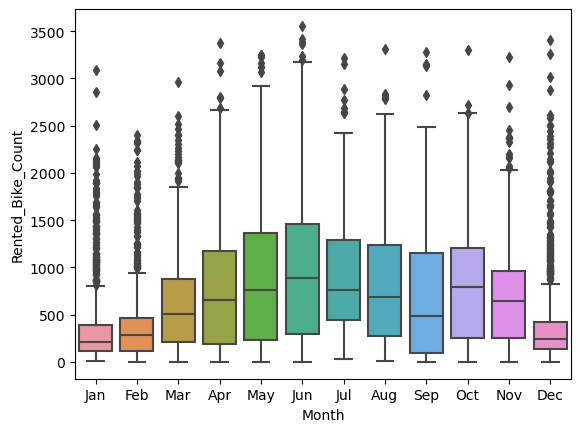

In [34]:
sns.boxplot(data=bikedata, x="Month", y="Rented_Bike_Count")

In [35]:
# GROUPING POR MES AND CALCULATING THE TOTAL RENTED BIKE COUNT
Month= bikedata.groupby('Month').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Month.head()


Month  Rented_Bike_Count
0   Jun             706728
1   Jul             691339
2   May             665948
3   Oct             626988
4   Aug             614190

#### Arriendo de Bicicletas por Estación del Año

<AxesSubplot:xlabel='Seasons', ylabel='Rented_Bike_Count'>

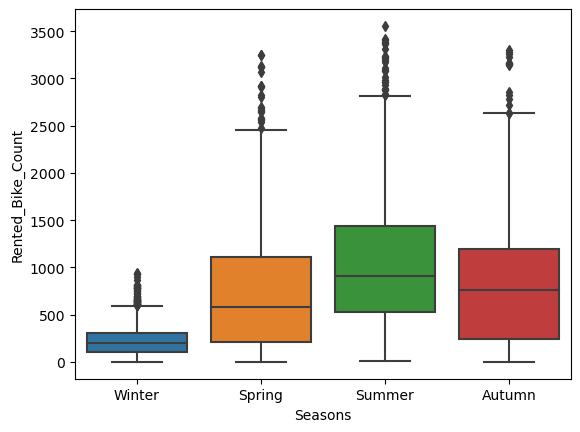

In [36]:
sns.boxplot(data=bikedata, x="Seasons", y="Rented_Bike_Count")

In [37]:
# AGRUOANDO POR ESTACION Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Season= bikedata.groupby('Seasons').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Season

Seasons  Rented_Bike_Count
0  Summer            2283234
1  Autumn            1790002
2  Spring            1611909
3  Winter             487169

### Correlacion de las variables del Dataset y el Arriendo de Bicicletas

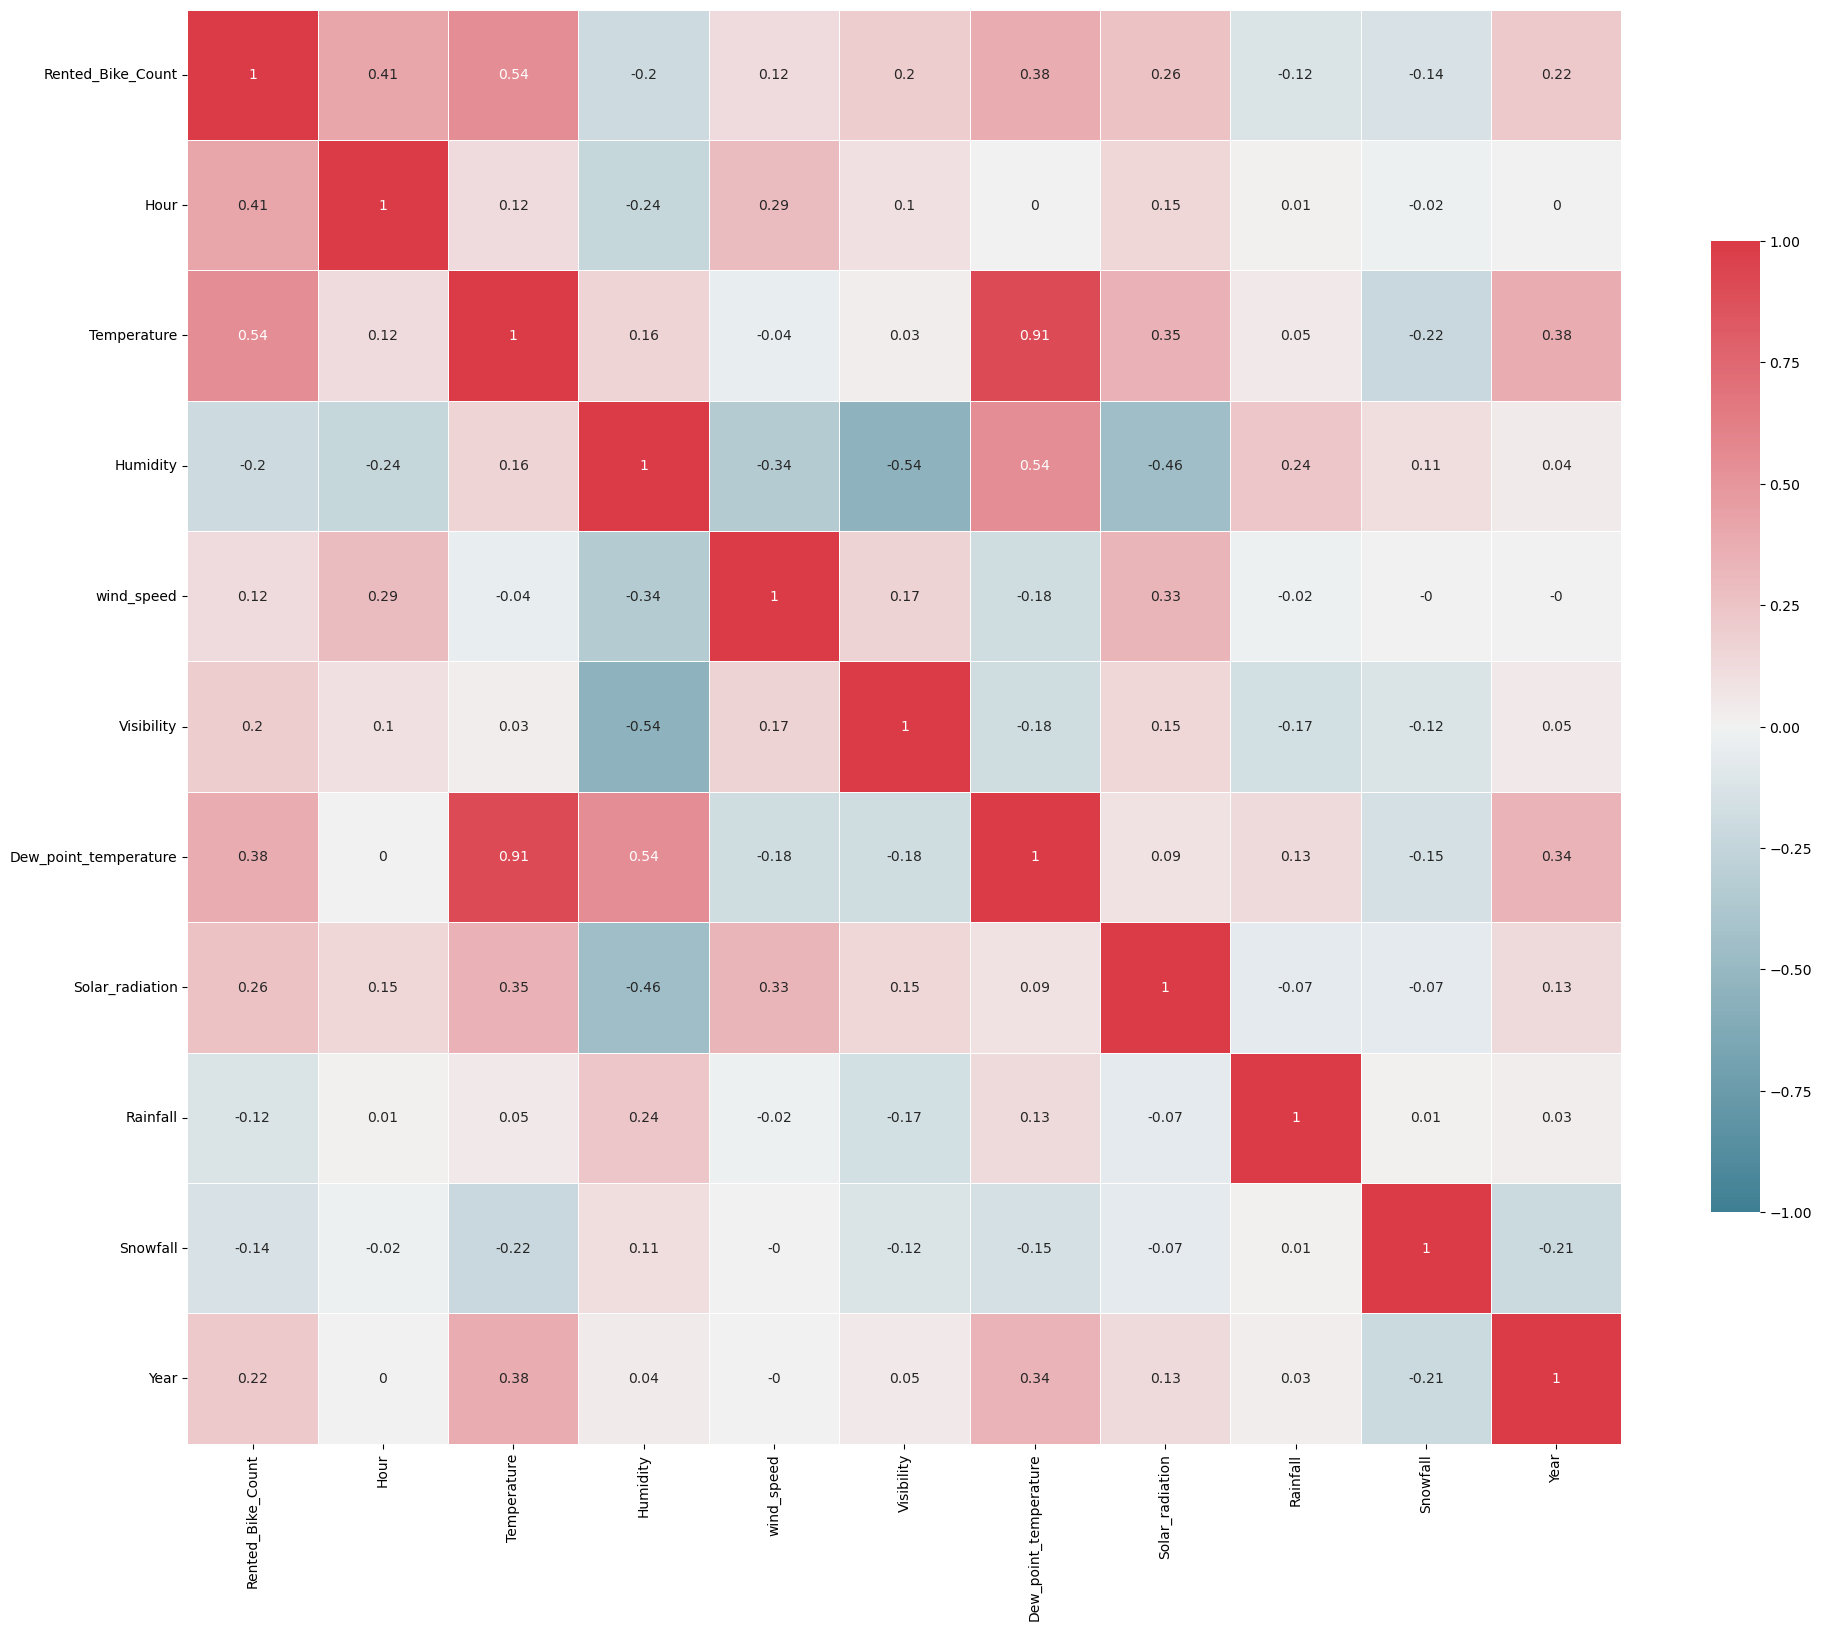

In [38]:
# Generando matriz de correlacion de datos
corr = bikedata.corr().round(2)
# Visualizando la matriz de correlacion
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

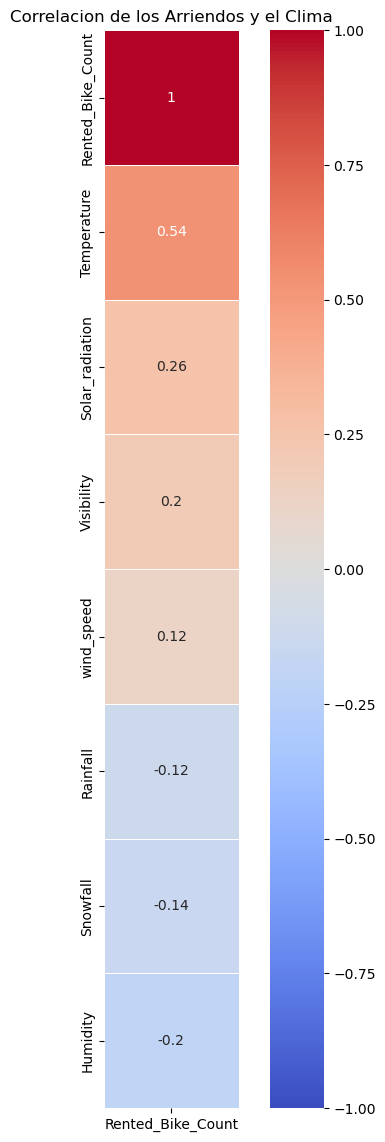

In [39]:
# Visualizando la correlacion de las variables del clima y el arriendo de Bicicletas

f, ax = plt.subplots(figsize=(8, 14))

corr= bikedata[['Temperature', 'wind_speed','Humidity','Solar_radiation','Rainfall','Visibility','Snowfall','Rented_Bike_Count']].corr()
sns.heatmap(data=corr[['Rented_Bike_Count']].sort_values(by= 'Rented_Bike_Count', ascending= False), vmin=-1, vmax=1, center=0,
            cmap='coolwarm', annot= True, square=True, linewidths = .5)
plt.title('Correlacion de los Arriendos y el Clima')
plt.savefig('Correlacion.png',dpi=300)
plt.show


### Eliminando las variables que no aportan al modelo

##### Se elimina la variable Functioning_Day, ya que todos los datos corresponden a 'Yes', por lo cual no es últil como predictor y la variable 'Dew_point_temperature'  que está correlacionada en un 0.91 a la variable Temperature.


In [41]:
bikedata_final= bikedata.drop(columns=['Functioning_Day','Dew_point_temperature' ], axis=1)
bikedata_final.head()

Date  Rented_Bike_Count  Hour  Temperature  Humidity  wind_speed  \
0 2017-01-12                254     0         -5.2        37         2.2   
1 2017-01-12                204     1         -5.5        38         0.8   
2 2017-01-12                173     2         -6.0        39         1.0   
3 2017-01-12                107     3         -6.2        40         0.9   
4 2017-01-12                 78     4         -6.0        36         2.3   

   Visibility  Solar_radiation  Rainfall  Snowfall Seasons     Holiday Month  \
0        2000              0.0       0.0       0.0  Winter  No Holiday   Jan   
1        2000              0.0       0.0       0.0  Winter  No Holiday   Jan   
2        2000              0.0       0.0       0.0  Winter  No Holiday   Jan   
3        2000              0.0       0.0       0.0  Winter  No Holiday   Jan   
4        2000              0.0       0.0       0.0  Winter  No Holiday   Jan   

   Year   Weekday  
0  2017  Thursday  
1  2017  Thursday  
2  2017  Thursday  
3  2017  Thursday  
4  2017  Thursday

### Graficando las Variables del dataset Modificado

<AxesSubplot:xlabel='Date', ylabel='Rented_Bike_Count'>

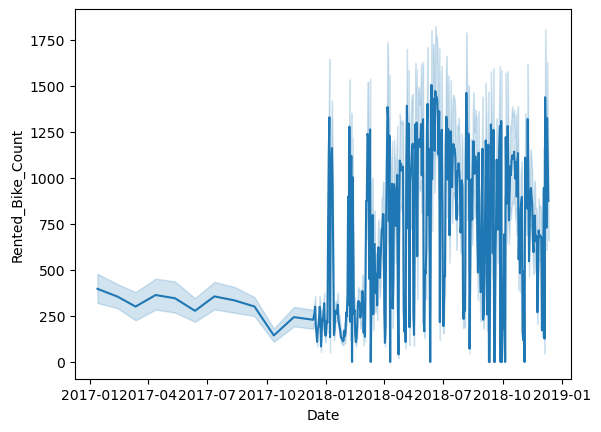

In [43]:
sns.lineplot(x='Date', y="Rented_Bike_Count",data= bikedata_final)

In [44]:
# AGRUOANDO POR FECHA Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Fecha= bikedata_final.groupby('Date').sum()['Rented_Bike_Count'].sort_values(ascending = True).reset_index()
Fecha

Date  Rented_Bike_Count
0   2018-04-10                  0
1   2018-11-04                  0
2   2018-02-10                  0
3   2018-10-05                  0
4   2018-09-30                  0
..         ...                ...
360 2018-06-21              34621
361 2018-06-20              34639
362 2018-08-06              35103
363 2018-06-19              35349
364 2018-06-13              36149

[365 rows x 2 columns]

In [68]:
Zeros= bikedata[bikedata_final['Rented_Bike_Count']==0]
print(Zeros.shape)
print(bikedata_final.shape)
print(f'Existen 295 valores 0 en la Rented_Bike_Count')

(295, 17)
(8760, 15)
Existen 295 valores 0 en la Rented_Bike_Count


<AxesSubplot:xlabel='Temperature', ylabel='Rented_Bike_Count'>

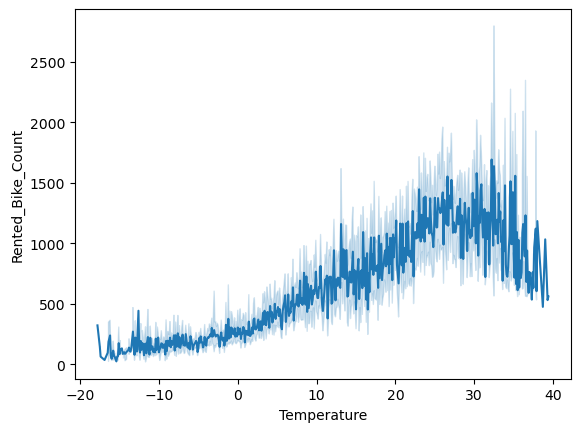

In [55]:
sns.lineplot(x="Temperature", y="Rented_Bike_Count",data= bikedata)

In [56]:
# AGRUOANDO POR TEMPERATURA Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Temperatura= bikedata.groupby('Temperature').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Temperatura.head()

Temperature  Rented_Bike_Count
0         23.4              45078
1         24.2              42243
2         25.0              39936
3         19.1              38835
4         20.6              38398

<AxesSubplot:xlabel='Humidity', ylabel='Rented_Bike_Count'>

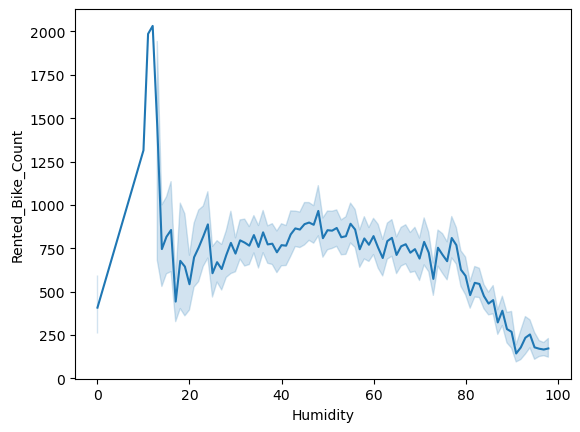

In [57]:
sns.lineplot(x='Humidity', y="Rented_Bike_Count",data= bikedata)

In [58]:
# AGRUOANDO POR HUMEDAD Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Humedad= bikedata.groupby('Humidity').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Humedad.head()

Humidity  Rented_Bike_Count
0        43             141773
1        53             140725
2        47             138105
3        56             134711
4        51             131966

<AxesSubplot:xlabel='wind_speed', ylabel='Rented_Bike_Count'>

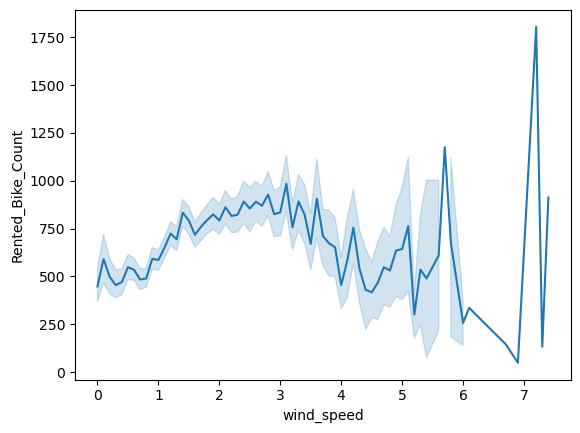

In [59]:
sns.lineplot(x='wind_speed', y="Rented_Bike_Count",data= bikedata)

In [61]:
# AGRUOANDO POR VELOCIDAD DEL VIENTO Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Viento= bikedata.groupby('wind_speed').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Viento.head()

wind_speed  Rented_Bike_Count
0         1.4             295750
1         1.2             291998
2         1.1             273334
3         1.5             271770
4         1.7             243281

<AxesSubplot:xlabel='Visibility', ylabel='Rented_Bike_Count'>

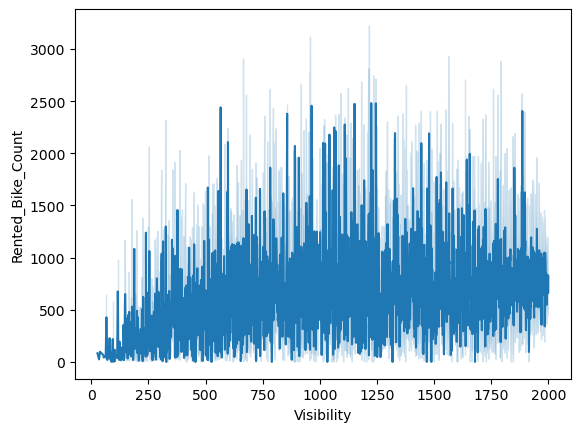

In [62]:
sns.lineplot(x='Visibility', y="Rented_Bike_Count",data= bikedata)

In [63]:
# AGRUOANDO POR VISIBILIDAD Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Visibilidad= bikedata.groupby('Visibility').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Visibilidad.head()

Visibility  Rented_Bike_Count
0        2000            1836690
1        1995              26276
2        1989              22383
3        1987              21544
4        1992              21405

<AxesSubplot:xlabel='Rainfall', ylabel='Rented_Bike_Count'>

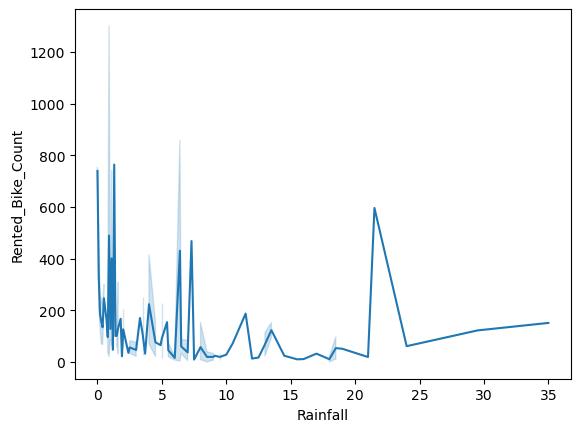

In [45]:
sns.lineplot(x='Rainfall', y="Rented_Bike_Count",data= bikedata)

In [64]:
# AGRUOANDO POR LLUVIA Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Lluvia= bikedata.groupby('Rainfall').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Lluvia.head()

Rainfall  Rented_Bike_Count
0       0.0            6086009
1       0.5              28604
2       0.1              15179
3       1.0               8419
4       1.5               5686

<AxesSubplot:xlabel='Snowfall', ylabel='Rented_Bike_Count'>

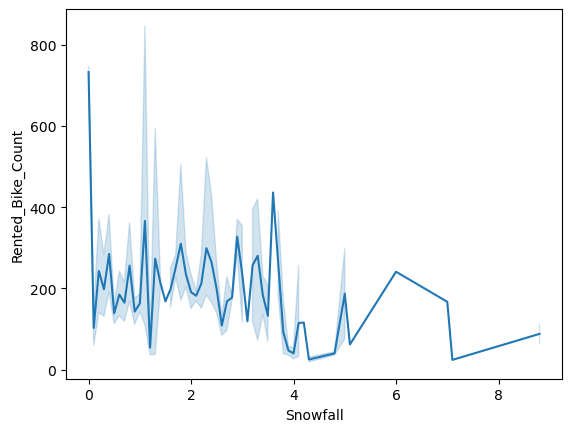

In [65]:
sns.lineplot(x='Snowfall', y="Rented_Bike_Count",data= bikedata)

In [66]:
# AGRUOANDO POR NIEVE Y CALCULANDO EL TOTAL DE ARRIENDOS DE BICICLETAS
Nieve= bikedata.groupby('Snowfall').sum()['Rented_Bike_Count'].sort_values(ascending = False).reset_index()
Nieve.head()

Snowfall  Rented_Bike_Count
0       0.0            6090314
1       0.3               8304
2       1.0               6357
3       0.4               5981
4       0.8               5632

In [67]:
%%time
profile = ProfileReport(bikedata_final,
                        explorative=True,
                       )
profile

CPU times: total: 31.2 ms
Wall time: 39 ms


Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Aparecen 5 advertencias de los datos procesados:

Valores Zero de variable Rented_ BiKe_Count (295)

Valores Zero de variable Hour, que corresponde a la hora 00:00 (365)

Valores Zero de variable Solar_Radiation (4300), no sabemos si no se midieron

Valores Zero de variable RainFall (8232), los días sin lluvia 0mm

Valores Zero de variable Snowfall (8317), los días sin nieve 0 cc

Se decide imputar datos de la primera variable en un nuevo notebook